In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from tf_keras.layers import Dense
from tf_keras import models,layers,Sequential

In [ ]:
#view the data set
iris = load_iris()
df = iris.keys()
df

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
#converting the dataset into dataframe format
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#adding target column to that
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#checking the missing values
df.isna().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


<Axes: >

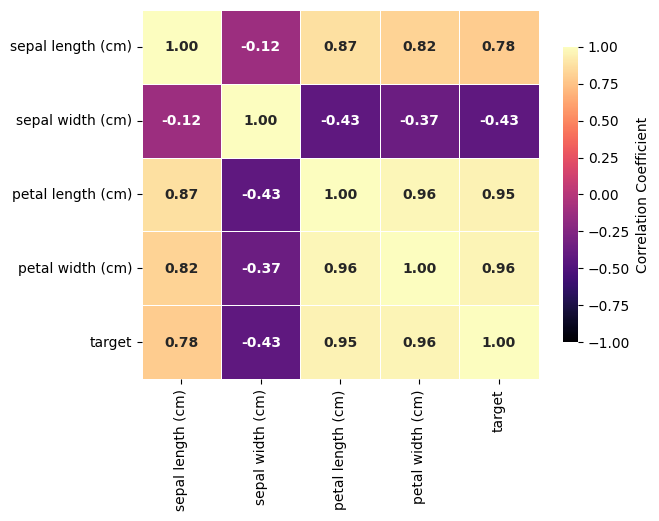

In [ ]:
#constructing the correlation matrix on that dataset
import seaborn as sns
sns.heatmap(
    df.corr(),
    annot=True,
    annot_kws={"size": 10, "weight": "bold"},
    linewidths=0.5,
    fmt=".2f",
    cmap="magma",
    vmin=-1,
    vmax=1,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)

# Building the model

In [ ]:
#split
x=df.drop('target',axis=1)
y=df['target']

#set up the random seed
np.random.seed(42)

#train and test data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

#scale the data
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

#model
model=Sequential()

#adding layers
model.add(Dense(64,input_shape=(x_train.shape[1],),activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='softmax'))

#complie
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'],)

#fit
model.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


4/4 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.3524
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.3524
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.3524
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.3524
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3524
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3524
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3524
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3524
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 0.3524
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.3524
E

In [ ]:
#accuracy
loss,accuracy=model.evaluate(x_test,y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

2/2 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 0.2889
Test Loss: 0.0000
Test Accuracy: 28.89%


In [ ]:
#predict
preds=model.predict(x_test)
print("Predicted labels:")
for i in range(len(preds)):
    print(f"Sample {i+1}: {np.max(preds[i])}")
print("Actual labels:")
for i in range(len(y_test)):
    print(f"Sample {i+1}: {y_test.iloc[i]}")

2/2 [==============================] - 0s 5ms/step
Predicted labels:
Sample 1: 0.9999999403953552
Sample 2: 0.9999999403953552
Sample 3: 0.9999999403953552
Sample 4: 0.9999999403953552
Sample 5: 0.9999999403953552
Sample 6: 0.9999999403953552
Sample 7: 0.9999999403953552
Sample 8: 0.9999999403953552
Sample 9: 0.9999999403953552
Sample 10: 0.9999999403953552
Sample 11: 0.9999999403953552
Sample 12: 0.9999999403953552
Sample 13: 0.9999999403953552
Sample 14: 0.9999999403953552
Sample 15: 0.9999999403953552
Sample 16: 0.9999999403953552
Sample 17: 0.9999999403953552
Sample 18: 0.9999999403953552
Sample 19: 0.9999999403953552
Sample 20: 0.9999999403953552
Sample 21: 0.9999999403953552
Sample 22: 0.9999999403953552
Sample 23: 0.9999999403953552
Sample 24: 0.9999999403953552
Sample 25: 0.9999999403953552
Sample 26: 0.9999999403953552
Sample 27: 0.9999999403953552
Sample 28: 0.9999999403953552
Sample 29: 0.9999999403953552
Sample 30: 0.9999999403953552
Sample 31: 0.9999999403953552
Sample 32: